# What I am going to study in this Computer Vision Lesson

### 1. Getting vision dataset to work with using `torchVision.datasets`
### 2. Architecture of CNN with PyTorch
### 3. An end-to-end multi-class image classification
### 4. Steps in modelling with CNN and PyTorch
    * Creating a CNN model with PyTorch
    * Picking a loss and Optimizer
    * Training a model
    * Evaluating a model

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## Import matplot for visualization
import matplotlib.pyplot as plt


#### getting Dataset from MNIST DataSet

In [3]:
train_data = datasets.FashionMNIST(
    root="data", # this will we be the folder where we will download Data.
    train = True, # this confirms that we are going to download training data, if false it will download test Data
    download = False,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None, # How do we want to transform the labels/targets ?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = False,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# for seeing train_data
image, label = train_data[0]
class_names = train_data.classes
# class_names = train_data.classes
image.shape

torch.Size([1, 28, 28])

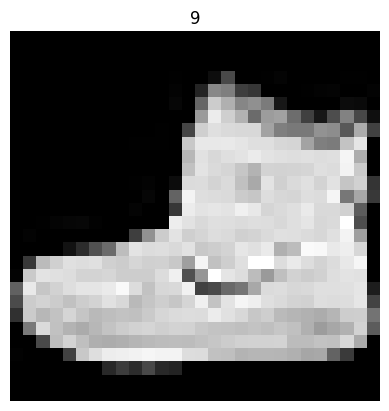

In [6]:
np_Image = image[0].numpy() * 255
# np_Image.shape
plt.imshow(np_Image, cmap='gray')
plt.title(label)
plt.axis(False)  # Optional: Turn off axes
plt.show()

In [7]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [8]:
from torch.utils.data import DataLoader
import numpy as np

In [9]:
# Setup the batch size hyperParameter
BATCH_SIZE = 32

train_dataLoader = DataLoader(
    dataset=train_data,
    batch_size= BATCH_SIZE,
    shuffle=True
)
test_dataLoader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)
train_dataLoader, test_dataLoader

(<torch.utils.data.dataloader.DataLoader at 0x1598e5810>,
 <torch.utils.data.dataloader.DataLoader at 0x1598e5a80>)

In [10]:
torch.manual_seed(42)

In [20]:
# let's see what is inside the training Data dataloader

train_features_batch, train_labels_batch = next(iter(train_dataLoader))
train_features_batch.shape, train_labels_batch.shape

AttributeError: 'DataLoader' object has no attribute 'shape'

TypeError: title() missing 1 required positional argument: 'label'

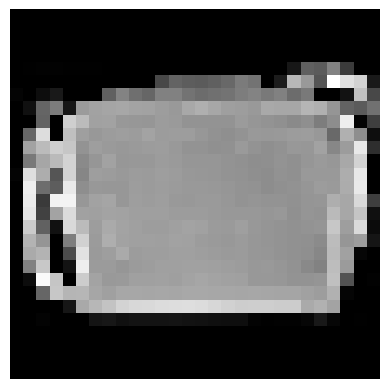

In [12]:
img, label = train_features_batch[5], train_labels_batch[5]

# Visualize the image using plt.imshow()
plt.imshow(img.squeeze(), cmap="gray")
plt.axis("off")
plt.title()
plt.show()


In [ ]:
# Creating a Flatter()
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
output.squeeze()

## Now let creating model for training data,

In [14]:
# first let Creating a class for Training model.

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self, x):
        return  self.layer_stack(x)

In [15]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape= len(class_names)
)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy = torch.rand([1, 28, 28])
model_0(dummy)

### Setting loss function and Optimizer

<font color="Green" size= "10"> Setting loss function and Optimizer </font>

* Since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`

* Optimizer - our Optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as out evaluation matric

In [16]:
# loss function
# optimizer
# Evaluation Metric - since we are working on a classification problem, let use accuracy as our evaluation metrix


import requests
from pathlib import Path

# Downloading helper functions from Learn PyTorch repo

if Path("helper_function.py").is_file():
    print("helper_function.py already exists")
else:
    print("downloading....")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py", "wb") as f:
        f.write(request.content)

downloading....


In [ ]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(params=model_0.parameters(), lr=0.1)



In [ ]:
from timeit import default_timer as timer

### Now It's time for training the model
####  Loop through epochs.
####  Loop through training batches, perform training steps, calculate the train loss *per batch*.
####  Loop through testing batches, perform testing steps, calculate the loss per batch.
####  Print out what's happening



In [ ]:
epochs = 3
startTime = timer
for epoch in range(epochs):
    train_loss = 0
    for batch, (X, y)  in enumerate(train_dataLoader):
        # putting model in training mode
        model_0.train()
        # Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        # accumulate train loss
        train_loss += loss

        # Optimizer zero grad
        optim.zero_grad()
        # Loss backward
        loss.backwark()
        # Optimizer step()
        optim.step()

    train_loss /= len(train_dataLoader)


    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataLoader:
            test_pred = model_0(X_test)
            # Calculate loss (Accumulative)
            test_loss += loss_fn(test_pred, y_test)
            # calculating test accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

            test_loss /= len(test_dataLoader)

            test_acc /= len(test_acc)

In [24]:
specific_batch = train_dataLoader.dataset[0]
data, level = specific_batch




tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,